# Read the data and draw scatter plot

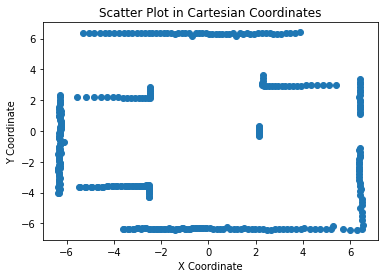

In [66]:
import matplotlib.pyplot as plt
import math
import numpy as np
import copy


# Path to your .txt file
file_path = 'distance_data.txt'

# Lists to store the Cartesian coordinates
x_values = []
y_values = []

# Read the file
with open(file_path, 'r') as file:
    for line in file:
        compass0, compass1, distance = line.split(',')
        compass0 = float(compass0.strip())
        compass1 = float(compass1.strip())
        distance = float(distance.strip())

        x = distance * np.cos(math.atan2(compass0, compass1))
        y = distance * np.sin(math.atan2(compass0, compass1))

        # Store the values
        x_values.append(x)
        y_values.append(y)

# Create a scatter plot
plt.scatter(x_values, y_values)

# Labeling the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot in Cartesian Coordinates')

# Show the plot
plt.show()


# Split

In [67]:
# Function to calculate the perpendicular distance from a point to a line
def perpendicular_distance(point, start, end):
    return np.abs(np.cross(end - start, start - point)) / np.linalg.norm(end - start)

# Split function using the Iterative-End-Point-Fit approach
def split(points, threshold):
    if len(points) < 3:
        return [points]

    # Find the farthest point from the line between the first and last points
    start, end = points[0], points[-1]
    distances = [perpendicular_distance(point, start, end) for point in points]
    max_dist = max(distances)
    index = distances.index(max_dist)
    
    # If the farthest distance is above the threshold, split the segment
    if max_dist > threshold:
        return split(points[:index + 1], threshold) + split(points[index:], threshold)
    else:
        return [points]



# Merge

In [68]:
# Function to calculate the MNE for a segment
def calculate_mne(segment):
    start, end = segment[0], segment[-1]
    distances = [perpendicular_distance(point, start, end) for point in segment]
    max_dist = max(distances)
    segment_length = np.linalg.norm(end - start)
    return max_dist / segment_length if segment_length != 0 else 0

# Function to merge segments based on MNE
def merge(segments):
    merged = []
    while segments:
        current_seg = segments.pop(0)
        mne_current = calculate_mne(current_seg)

        while segments:
            next_seg = segments[0]
            merged_seg = np.vstack((current_seg, next_seg))
            mne_merged = calculate_mne(merged_seg)
            mne_next = calculate_mne(next_seg)

            # Compare the MNE of the merged segment with the max MNE of the individual segments
            if mne_merged < mne_current and mne_merged < mne_next:
                # Merge segments
                current_seg = merged_seg
                segments.pop(0)  # Remove the merged segment
                mne_current = mne_merged  # Update the MNE of the current merged segment
            else:
                break

        merged.append(current_seg)
    return merged

[Text(0.5, 0, 'X coordinate'), Text(0, 0.5, 'Y coordinate')]

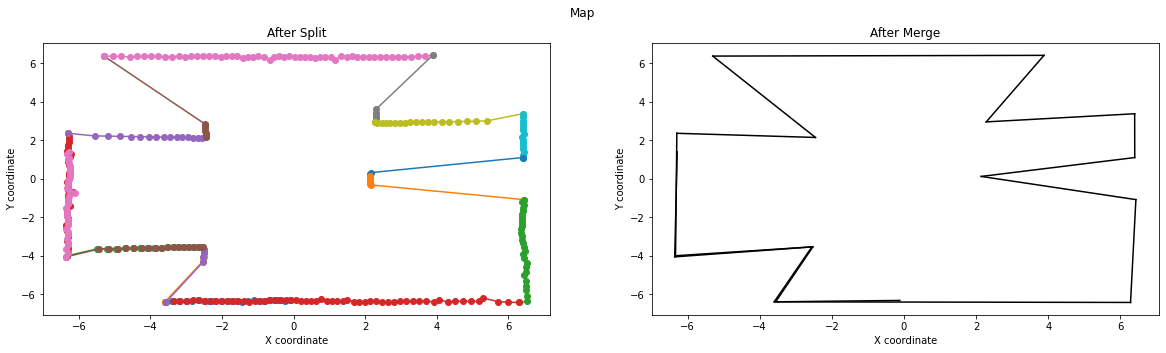

In [72]:
# Convert x_values and y_values to a list of points
points = np.array(list(zip(x_values, y_values)))

split_threshold = 1  # Threshold distance for splitting
segments_split = split(points, split_threshold)

segment_split_copy = copy.deepcopy(segments_split)

segments_merge = merge(segment_split_copy)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Map')

for segment in segments_split:
    segment = np.array(segment)
    ax1.plot(segment[:, 0], segment[:, 1], marker='o')
ax1.set_title('After Split')
ax1.set(xlabel='X coordinate', ylabel='Y coordinate')

for segment in segments_merge:
    segment = np.array(segment)
    ax2.plot([segment[0, 0], segment[-1, 0]], [segment[0, 1], segment[-1, 1]], 'k-')
ax2.set_title('After Merge')
ax2.set(xlabel='X coordinate', ylabel='Y coordinate')